In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import auc


In [2]:
datafile = '/home/mmaisonnave/repositories/hrir-simulation-results/data/displaced_person_results.csv'

df = pd.read_csv(datafile, index_col=0)
print(df.shape)
df.head()

(9450, 18)


,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,representation
Date,,,,,,,,,,,,,,,,,,
2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2022-11-23 17:41,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow


In [3]:
models = set(df['Model'])
ranking_functions = set(df['Ranking Function'])
Ns = set(df['N'])
ns = set(df['n'])
representations = set(df['representation'])

seed_count = 5

print(f'{"model":20}\t x{len(models)}')
print(f'{"ranking function":20}\t x{len(ranking_functions)}')
print(f'{"N":20}\t x{len(Ns)}')
print(f'{"n":20}\t x{len(ns)}')
print(f'{"representations":20}\t x{len(representations)}')
print(f'{"seeds":20}\t x{seed_count}')


model               	 x2
ranking function    	 x9
N                   	 x7
n                   	 x5
representations     	 x3
seeds               	 x5


In [4]:
# AVERAGING RESULTS FROM DIFFERENT SEEDS
count=0
data={}
for N in Ns:
    for n in ns:
        for model in models:
            for representation in representations:
                for ranking_function in ranking_functions:
                    auxdf=df[(df['Model']==model) & 
                             (df['N']==N) & (df['n']==n) &
                             (df['representation']==representation) &
                             (df['Ranking Function']==ranking_function) 
                            ]
                    assert auxdf.shape[0]==seed_count
                    
                    
                    auxdf=auxdf.drop(columns=['Dataset', 'representation', 'Ranking Function', 'Model'])
                    auxdict=auxdf.mean().to_dict()
                    if len(data)==0: # First iteration
                        for key in auxdict :
                            data[key]=[]
                        data['Model']=[]
                        data['representation']=[]
                        data['Ranking Function']=[]
                    for key in auxdict:
                        data[key].append(auxdict[key])
                    data['Model'].append(model)
                    data['representation'].append(representation)
                    data['Ranking Function'].append(ranking_function)



#                     count+=1
results = pd.DataFrame(data)
results['Dataset']='displaced_persons'
# results['Ranking Function']='relevance'
results

,Seed,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,Model,representation,Ranking Function,Dataset
0,2474260.0,364.0,1.0,23.0,0.794847,0.302391,0.998452,0.464196,8.0,645.0,5124.0,1488.0,1.0,0.089423,svm,glove,relevance,displaced_persons
1,2474260.0,364.0,1.0,23.0,0.089694,0.089694,1.000000,0.164623,3.0,651.0,0.0,6607.0,0.0,0.063462,svm,glove,uncertainty_with_avg_diversity,displaced_persons
2,2474260.0,364.0,1.0,23.0,0.089419,0.089419,1.000000,0.164158,5.0,649.0,0.0,6609.0,0.0,0.054808,svm,glove,relevance_with_avg_diversity,displaced_persons
3,2474260.0,364.0,1.0,23.0,0.089281,0.089281,1.000000,0.163926,6.0,648.0,0.0,6610.0,0.0,0.051923,svm,glove,uncertainty,displaced_persons
4,2474260.0,364.0,1.0,23.0,0.089281,0.089281,1.000000,0.163926,6.0,648.0,0.0,6610.0,0.0,0.089423,svm,glove,relevance_with_min_diversity,displaced_persons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,2474260.0,1820.0,20.0,570.0,0.962897,0.712716,0.873077,0.784788,134.0,454.0,6008.0,183.0,66.0,0.084231,logreg,bow,relevance_with_min_diversity,displaced_persons
1886,2474260.0,1820.0,20.0,570.0,0.961258,0.691304,0.910305,0.785832,130.0,477.0,5974.0,213.0,47.0,0.082154,logreg,bow,3quarter_relevance_1quarters_uncertainty,displaced_persons
1887,2474260.0,1820.0,20.0,570.0,0.961258,0.691304,0.910305,0.785832,130.0,477.0,5974.0,213.0,47.0,0.082154,logreg,bow,1quarter_relevance_3quarters_uncertainty,displaced_persons
1888,2474260.0,1820.0,20.0,570.0,0.961258,0.691304,0.910305,0.785832,130.0,477.0,5974.0,213.0,47.0,0.082154,logreg,bow,half_relevance_half_uncertainty,displaced_persons


In [5]:
# Fixed model and representation (based on experimentation on 20newsgroup)
results = results[(results['Model']=='logreg') & (results['representation']=='bow')]
print(results.shape)

(315, 18)


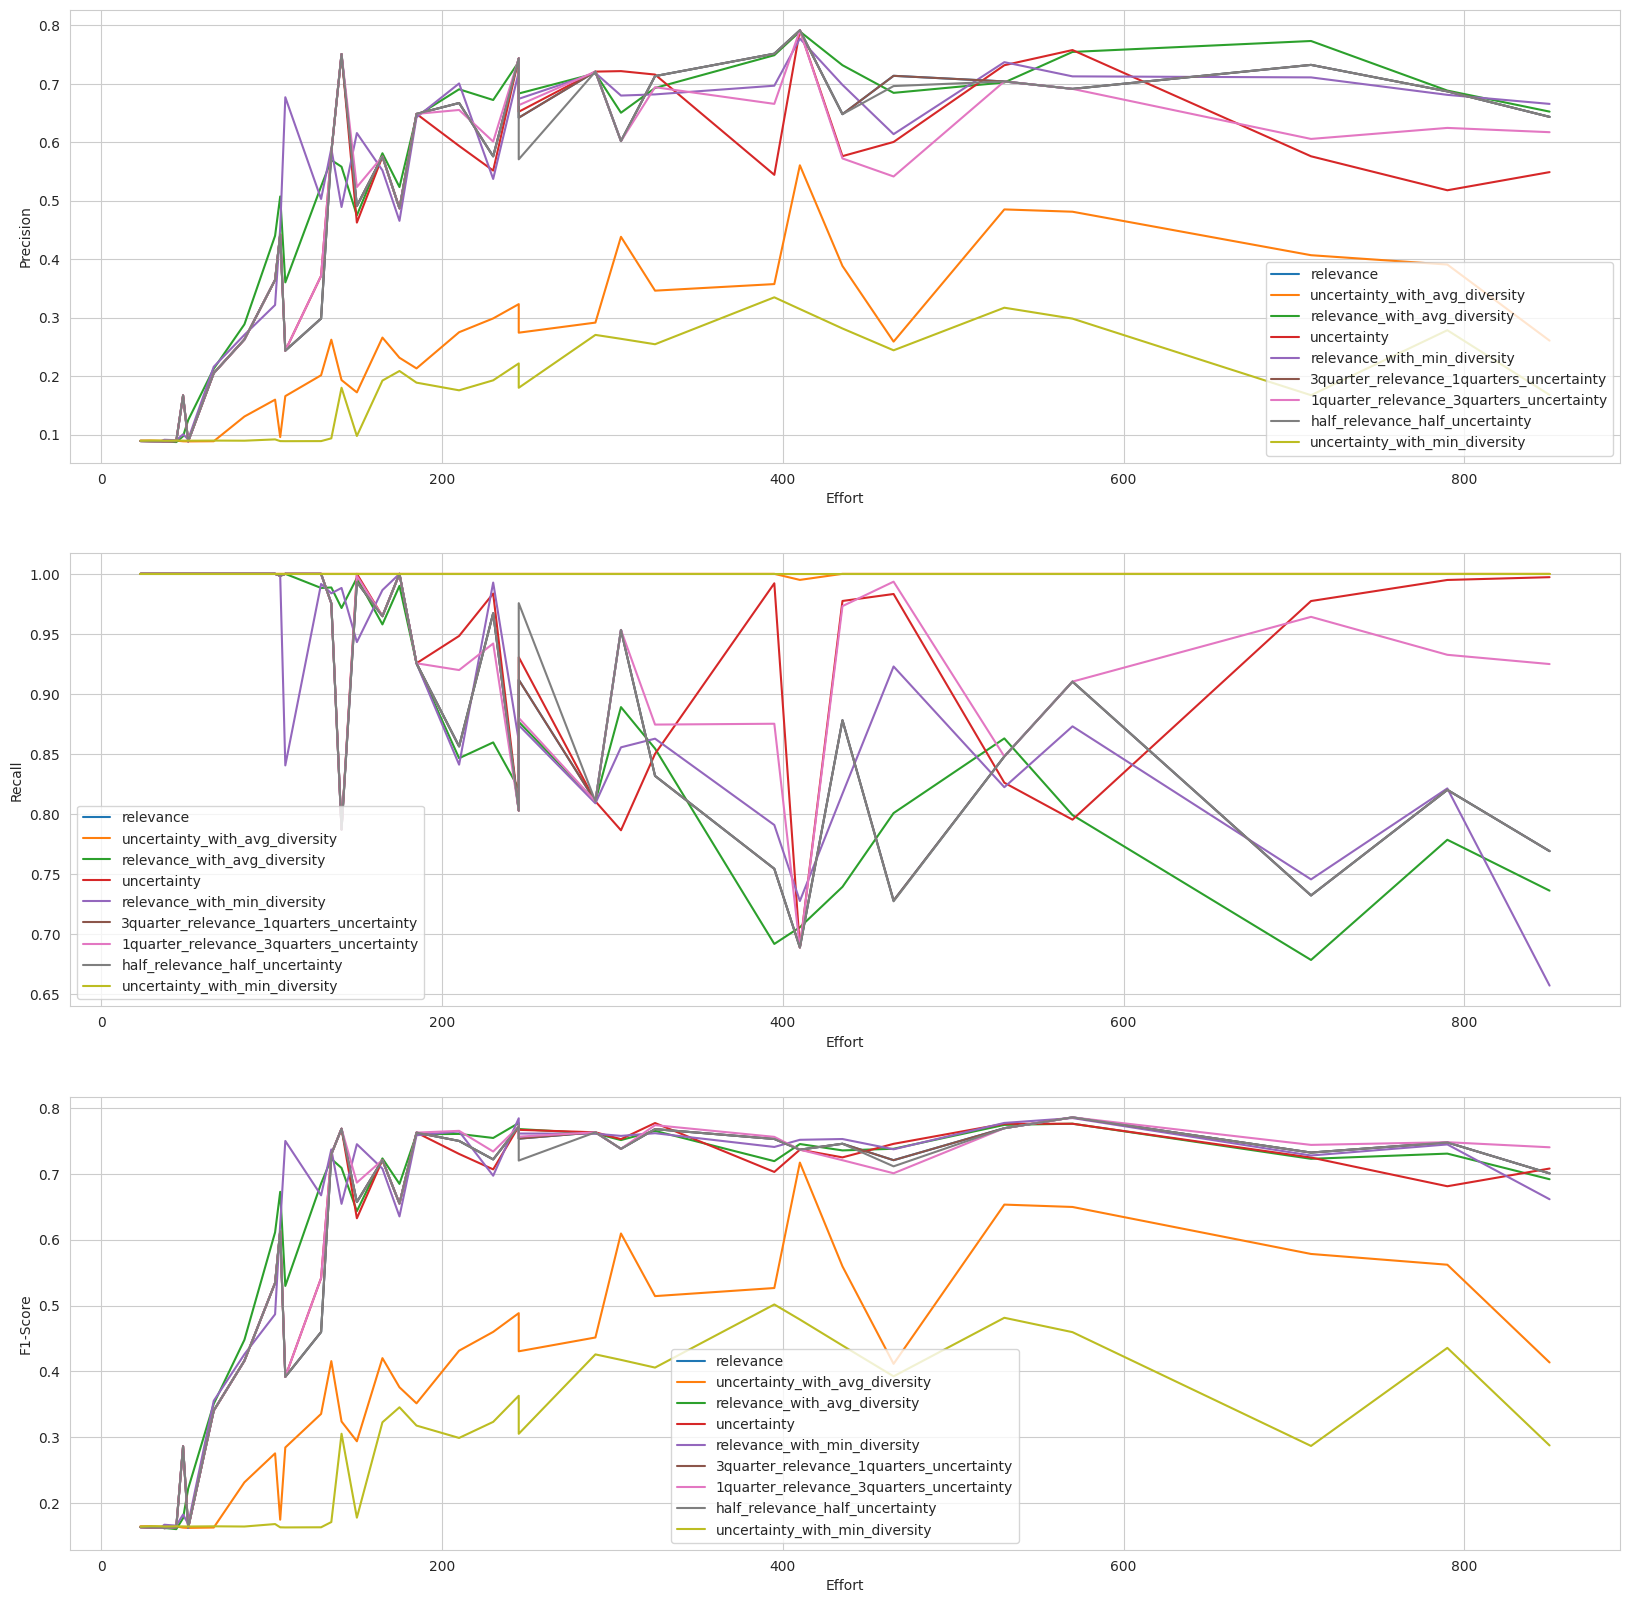

In [8]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(3,1,figsize=(20,20))

auc_data={'auc_precision':[],
          'auc_recall':[],
          'auc_f1':[],
          'ranking_function':[]
         }

for ranking_function in ranking_functions:
    auxdf=results[results['Ranking Function']==ranking_function]
    auxdf=auxdf.sort_values(by='Effort')
    auc_data['ranking_function'].append(ranking_function)
    #Precision
    metric='Precision'
    x = auxdf['Effort']
    y = auxdf[metric]
    auc_precision = auc(x,y)/auc(x,[1]*len(y))
    auc_data['auc_precision'].append(auc_precision)
    ax[0].plot(x,y, label=ranking_function)

    #Recall
    metric='Recall'
    x = auxdf['Effort']
    y = auxdf[metric]
    auc_recall = auc(x,y)/auc(x,[1]*len(y))
    auc_data['auc_recall'].append(auc_recall)
    ax[1].plot(x,y, label=ranking_function)

    #F1-Score
    metric='F1-Score'
    x = auxdf['Effort']
    y = auxdf[metric]
    auc_f1 = auc(x,y)/auc(x,[1]*len(y))
    auc_data['auc_f1'].append(auc_f1)
    ax[2].plot(x,y, label=ranking_function)
    
ax[0].set_xlabel('Effort')
ax[1].set_xlabel('Effort')
ax[2].set_xlabel('Effort')
ax[0].set_ylabel('Precision')
ax[1].set_ylabel('Recall')
ax[2].set_ylabel('F1-Score')
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [11]:
pd.DataFrame(auc_data).sort_values(by='auc_f1', ascending=False)

,auc_precision,auc_recall,auc_f1,ranking_function
4,0.629746,0.853820,0.700999,relevance_with_min_diversity
2,0.649321,0.823216,0.698158,relevance_with_avg_diversity
6,0.587945,0.924823,0.697834,1quarter_relevance_3quarters_uncertainty
0,0.626437,0.851488,0.693778,relevance
5,0.626437,0.851488,0.693778,3quarter_relevance_1quarters_uncertainty
7,0.623493,0.853189,0.692336,half_relevance_half_uncertainty
3,0.578563,0.924338,0.686247,uncertainty
1,0.336383,0.999878,0.490761,uncertainty_with_avg_diversity
8,0.222658,1.000000,0.357446,uncertainty_with_min_diversity
